# Control Variate

## Table of Contents
* [1) Using Antithetic Variance](#first-bullet)
    - [1a) Varying $S_0$ and $T$](#firsta-bullet)
* [2) Sampling at Expiry](#second-bullet)
    - [2a) Simple Example](#seconda-bullet)
    - [2b) Varying $S_0$ and $T$](#secondb-bullet)
    - [2c) Varying $K$ and $T$](#secondc-bullet)
* [3) Sampling at Exercise](#third-bullet)
    - [3a) Control Variate Plot to be put in Assignment](#thirda-bullet)

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os
import time
from scipy.stats import norm

# local
from LSM import MonteCarloOptionPricing
from FD import AmericanPutFiniteDifference
from figs import plot_payoffs

## 1) Using Antithetic Variance <a class="anchor" id="first-bullet"></a>

### 1a) Varying $S_0$ and $T$ <a class="anchor" id="firsta-bullet"></a>

In [136]:
# Define ranges for K and T
S0_values = [90, 100, 110]
T_values = [2, 3, 4]

# List to store results
prices_av = []
parameter_labels = []
time_av = []
duration_av= []

# Loop over combinations of K and T
for S0 in S0_values:
        for T in T_values:
            print(f"Running simulation for S0={S0}, T={T}")
            start_time = time.time()  # Record the start time

            # Initialize the Monte Carlo pricer
            mc_option_pricing = MonteCarloOptionPricing(r=0.03, S0=S0, K=100., T=T, σ=0.25, λ=0.4, dim = 100_000, n=252, seed=15_001, use_AV=True)

            # Simulate GBM and apply the LSM algorithm
            simulated_paths = mc_option_pricing.GeometricBrownianMotion_vec()
            price = mc_option_pricing.american_option_LSM(poly_degree=3, otype='put')[0]
            
            end_time = time.time()  # Record the end time
            duration = end_time - start_time  # Calculate the duration

            time_av.append(end_time)
            duration_av.append(duration)
            # Store the squared correlation and parameter label
            parameter_label = f"{S0}/{T}"
            prices_av.append(price)
            parameter_labels.append(parameter_label)

Running simulation for S0=90, T=2
Running simulation for S0=90, T=3
Running simulation for S0=90, T=4
Running simulation for S0=100, T=2
Running simulation for S0=100, T=3
Running simulation for S0=100, T=4
Running simulation for S0=110, T=2
Running simulation for S0=110, T=3
Running simulation for S0=110, T=4


In [ ]:
duration_av

In [137]:
prices_av

[16.15098968744029,
 17.776438232824646,
 19.04119269484284,
 11.511120418885616,
 13.455063065731405,
 14.932145436888485,
 8.108282211944823,
 10.131725047071455,
 11.69711363595967]

In [139]:
prices_fd

[16.164226897427174,
 17.799281721677424,
 19.012683820798422,
 11.546012544182725,
 13.478326882286776,
 14.91809167634485,
 8.15009446923408,
 10.179260729849313,
 11.720083971673608]

## 2) Sampling at Expiry <a class="anchor" id="second-bullet"></a>

### 2a) Simple Example <a class="anchor" id="firsta-bullet"></a>

In [3]:
# create instance from class
mc_option_pricing = MonteCarloOptionPricing(r=0.03, S0=90., K=100, T=1, σ=0.25, λ=0.4, dim=10_000, n=252, seed=15, use_AV=True)

In [4]:
# simulate MC
simulated_paths = mc_option_pricing.GeometricBrownianMotion_vec()
# Run LSM
mc_option_pricing.american_option_LSM(poly_degree=3, otype='put')

(13.765320190576793,
 array([0, 0, 0, ..., 1, 0, 1]),
 array([21.12864618, 22.57783645, 18.90788873, ...,  0.        ,
        16.95587218,  0.        ]),
 0.10592604339317795)

In [5]:
mc_option_pricing.payoffs.mean()

13.528627852960211

In [7]:
# Access and print the payoffs
American_payoffs = mc_option_pricing.payoffs
print("Individual Payoffs:", American_payoffs)

#Control_payoffs = np.exp(-mc_option_pricing.r * mc_option_pricing.T) * np.maximum(mc_option_pricing.K - mc_option_pricing.S[:, -1], 0) # European put at expiry
Control_payoffs = np.exp(-mc_option_pricing.r * mc_option_pricing.T) * np.maximum(mc_option_pricing.K - mc_option_pricing.S[:, -1], 0) # European put at expiry
print("Control payoffs:", Control_payoffs)

Individual Payoffs: [21.12864618 22.57783645 18.90788873 ...  0.         16.95587218
  0.        ]
Control payoffs: [22.06697811 18.99929242 25.50210842 ...  0.69063994 23.83437842
  0.        ]


Now, the prices (averaging over the previously payoffs)

In [8]:
# Estimate prices by crude Monte Carlo
American_price_est = np.mean(American_payoffs)
Control_price_est = np.mean(Control_payoffs)
print(American_price_est)
print(Control_price_est)
assert len(American_payoffs) == mc_option_pricing.dim and len(Control_payoffs) == mc_option_pricing.dim, "Lengths of American_payoffs and Control_payoffs are not equal to no. of simulations"

13.528627852960211
13.121472167897263


Auxiliary functions (note, necessary to run prior to Section 1.b and 1.c)

In [9]:
def calculate_theta(american_payoffs, control_payoffs):
    return -np.cov(american_payoffs, control_payoffs)[0, 1] / np.var(control_payoffs) # remember to use off-diagonal
 
def calculate_correlation(american_payoffs, control_payoffs):
    return -np.corrcoef(american_payoffs, control_payoffs)[0, 1]

Calculate statistics

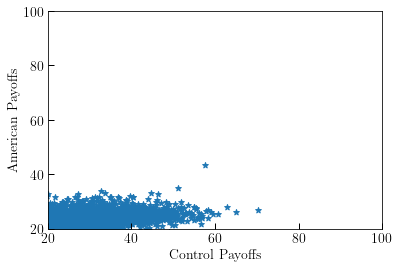

In [10]:
plot_payoffs(American_payoffs, Control_payoffs, x_limits=(20, 100), y_limits=(20, 100))

### 2b) Varying $S_0$ and $T$ <a class="anchor" id="secondb-bullet"></a>

Running simulation for S0=90, T=2
ρ: -0.732419
ρ^2: 0.536437
Control Variate Price Estimate: 16.212239
Variance Ratio of Payoffs (American/Control Variate): 2.157205
Reduction Factor (1 - ρ^2)^(-1): 2.157205


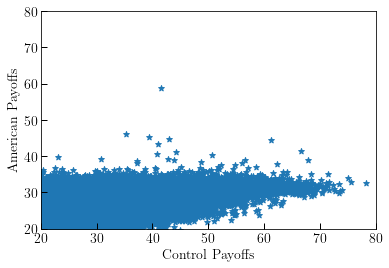

Running simulation for S0=90, T=3
ρ: -0.724079
ρ^2: 0.524290
Control Variate Price Estimate: 18.161341
Variance Ratio of Payoffs (American/Control Variate): 2.102120
Reduction Factor (1 - ρ^2)^(-1): 2.102120


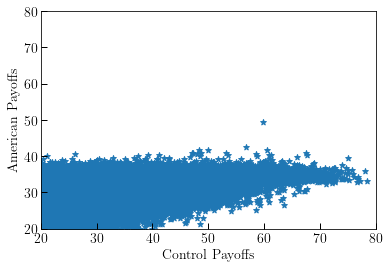

Running simulation for S0=90, T=4
ρ: -0.717352
ρ^2: 0.514595
Control Variate Price Estimate: 19.760141
Variance Ratio of Payoffs (American/Control Variate): 2.060133
Reduction Factor (1 - ρ^2)^(-1): 2.060133


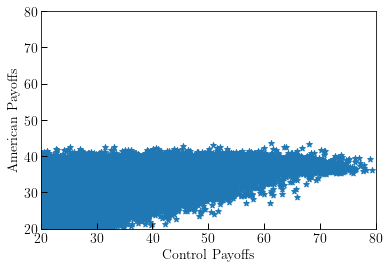

Running simulation for S0=100, T=2
ρ: -0.784880
ρ^2: 0.616036
Control Variate Price Estimate: 11.517313
Variance Ratio of Payoffs (American/Control Variate): 2.604411
Reduction Factor (1 - ρ^2)^(-1): 2.604411


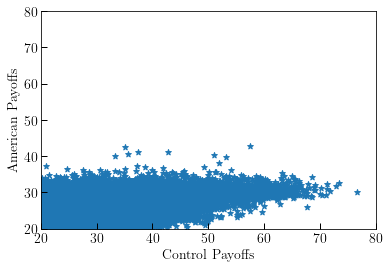

Running simulation for S0=100, T=3
ρ: -0.771723
ρ^2: 0.595557
Control Variate Price Estimate: 13.730390
Variance Ratio of Payoffs (American/Control Variate): 2.472534
Reduction Factor (1 - ρ^2)^(-1): 2.472534


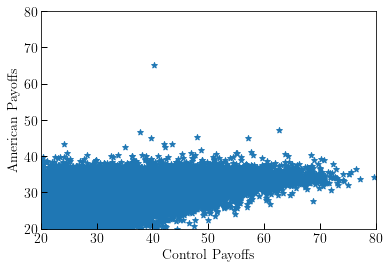

Running simulation for S0=100, T=4
ρ: -0.759372
ρ^2: 0.576646
Control Variate Price Estimate: 15.509199
Variance Ratio of Payoffs (American/Control Variate): 2.362091
Reduction Factor (1 - ρ^2)^(-1): 2.362091


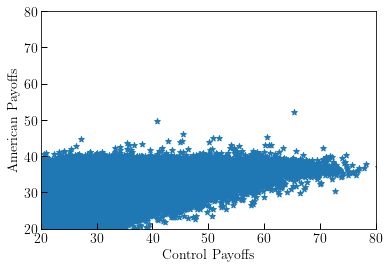

Running simulation for S0=110, T=2
ρ: -0.812739
ρ^2: 0.660545
Control Variate Price Estimate: 8.043136
Variance Ratio of Payoffs (American/Control Variate): 2.945898
Reduction Factor (1 - ρ^2)^(-1): 2.945898


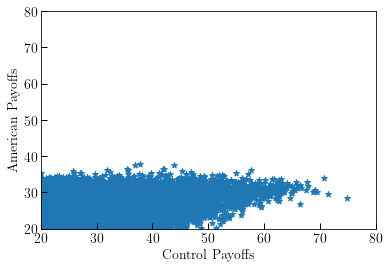

Running simulation for S0=110, T=3
ρ: -0.798454
ρ^2: 0.637528
Control Variate Price Estimate: 10.350698
Variance Ratio of Payoffs (American/Control Variate): 2.758835
Reduction Factor (1 - ρ^2)^(-1): 2.758835


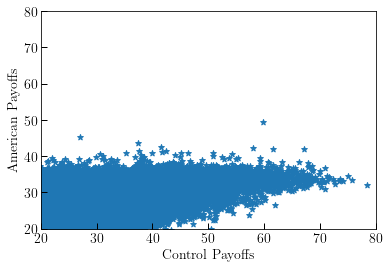

Running simulation for S0=110, T=4
ρ: -0.786515
ρ^2: 0.618605
Control Variate Price Estimate: 12.204653
Variance Ratio of Payoffs (American/Control Variate): 2.621957
Reduction Factor (1 - ρ^2)^(-1): 2.621957


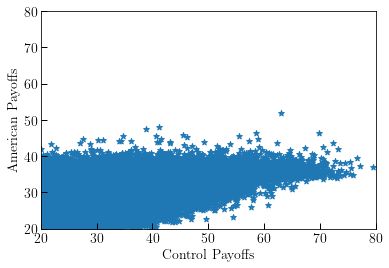

<Figure size 432x288 with 0 Axes>

In [15]:
# Define ranges for K and T
S0_values = [90, 100, 110]
T_values = [2, 3, 4]

# List to store squared correlations and parameter labels
squared_correlations = []
parameter_labels = []
prices_lsm = []

# Loop over combinations of K and T
for S0 in S0_values:
        for T in T_values:
            print(f"Running simulation for S0={S0}, T={T}")

            # Initialize the Monte Carlo pricer
            mc_option_pricing = MonteCarloOptionPricing(r=0.03, S0=S0, K=100., T=T, σ=0.25, λ=0.4, dim=100_000, n=252, seed=15, use_AV=True)

            # Simulate GBM and apply the LSM algorithm
            simulated_paths = mc_option_pricing.GeometricBrownianMotion_vec()
            mc_option_pricing.american_option_LSM(poly_degree=3, otype='put')

            # Access and print the payoffs
            American_payoffs = mc_option_pricing.payoffs
            Control_payoffs = np.exp(-mc_option_pricing.r * mc_option_pricing.T) * np.maximum(mc_option_pricing.K - mc_option_pricing.S[:, -1], 0)

            # Estimate prices by crude Monte Carlo
            American_price_est = np.mean(American_payoffs)
            Control_price_est = np.mean(Control_payoffs)
            
            # Compute expected mean of European control variate (i.e., BS)
            control_mean = mc_option_pricing.BS_option_value('put')
            
            # Calculates Y_i's
            θ = calculate_theta(American_payoffs, Control_payoffs)
            Y = American_payoffs + θ*(Control_payoffs - control_mean)
            ρ = calculate_correlation(American_payoffs, Control_payoffs)
            squared_corr = ρ**2
            price_estimate = np.mean(Y)
            variance_ratio = np.var(American_payoffs) / np.var(Y)
            reduction_factor = (1-squared_corr)**(-1)

            # Print results
            print(f'\u03C1: {ρ:.6f}')
            print(f'\u03C1^2: {squared_corr:.6f}')
            print(f'Control Variate Price Estimate: {price_estimate:.6f}')
            print(f'Variance Ratio of Payoffs (American/Control Variate): {variance_ratio:.6f}')
            print(f"Reduction Factor (1 - \u03C1^2)^(-1): {reduction_factor:.6f}")
           
            # Plot payoffs for correlation
            plot_payoffs(American_payoffs, Control_payoffs, x_limits=(20, 80), y_limits=(20, 80))

            # Clear the plot for the next iteration
            plt.clf()
            
            # Store the squared correlation and parameter label
            parameter_label = f"{S0}/{T}"
            squared_correlations.append(squared_corr)
            parameter_labels.append(parameter_label)
            prices_lsm.append(price_estimate)

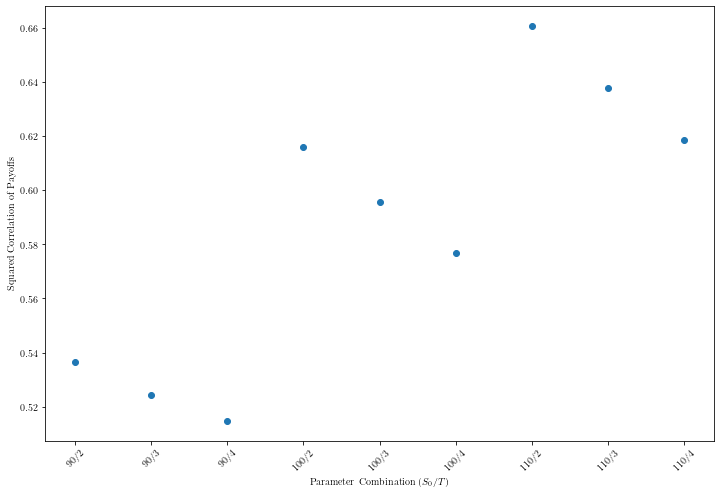

In [16]:
# Plot squared correlations against parameter combinations
plt.figure(figsize=(12, 8))
plt.plot(parameter_labels, squared_correlations, 'o', label='Squared Correlation')
plt.xlabel(r'Parameter Combination ($S_0$/$T$)')
plt.ylabel('Squared Correlation of Payoffs')
#plt.title('Squared Correlation of Payoffs for Different Option Parameters')
plt.xticks(rotation=45)
#plt.legend()
plt.show()

In [17]:
prices_lsm

[16.212238913531866,
 18.161340657298382,
 19.760140819805525,
 11.517313223062395,
 13.730390169518317,
 15.509199096812818,
 8.043136084513417,
 10.350698282779783,
 12.204653450261425]

## 3) Sampling at Exercise <a class="anchor" id="third-bullet"></a>

In [33]:
# Create instance from class with the following inputs
mc_option_pricing_ex = MonteCarloOptionPricing(r=0.03, S0=90., K=100, T=1., σ=0.25, λ=0.4, dim=100_000, n=252, seed=15, use_AV=True)

# simulate MC
simulated_paths = mc_option_pricing_ex.GeometricBrownianMotion_vec()
# Run LSM
lsm_output = mc_option_pricing_ex.american_option_LSM(poly_degree=3, otype='put')

#exercise_times
American_exercise_times = lsm_output[1]

# Access and print the payoffs
American_payoffs_ex = mc_option_pricing_ex.payoffs

# Initialize variables for Control payoffs
Control_payoffs_ex = np.zeros(mc_option_pricing_ex.dim)

In [34]:
mc_option_pricing_ex.S.shape

(100000, 252)

Auxiliary functions

In [35]:
def calculate_theta(american_payoffs, control_payoffs):
    return -np.cov(american_payoffs, control_payoffs)[0, 1] / np.var(control_payoffs) # remember to use off-diagonal
 
def calculate_correlation(american_payoffs, control_payoffs):
    return -np.corrcoef(american_payoffs, control_payoffs)[0, 1]

def get_stock_price_at_exercise(S, American_exercise_times, n, r, T, K, σ, S0, default_value=500):
    """
    Get the stock price at the specific exercise time for each path.

    Parameters:
    S (np.array): 2D array of stock prices for different paths and timesteps.
    American_exercise_times (np.array): Array of exercise times for each path.
    n (int): The number of time steps.
    r (float): Risk-free interest rate.
    T (float): Time to maturity.
    K (float): Strike price of the option.
    default_value (float): Default stock price if the option was never exercised.

    Returns:
    np.array: Array of payoffs at the specific exercise time for each path.
    """
    stock_prices_at_exercise = []  # List to store stock prices at exercise times
    Control_payoffs_ex = np.zeros(len(American_exercise_times))  # Initialize array for control payoffs
    Control_mean_ex = np.zeros(len(American_exercise_times))
    
    for i, exercise_time in enumerate(American_exercise_times):
        if exercise_time == T:  # Option was never exercised
            stock_price = default_value
        else:
            column_index = int(exercise_time / (T / n))  # Convert time to column index
            stock_price = S[i, column_index]

        stock_prices_at_exercise.append(stock_price)
        Control_payoffs_ex[i] = np.exp(-r * exercise_time) * np.maximum(K - stock_price, 0)
        
        d1 = (1 / (σ * np.sqrt(exercise_time))) * (np.log(S0 / K) + (r + 0.5 * σ ** 2) * exercise_time)
        d2 = d1 - σ * np.sqrt(exercise_time)
        Control_mean_ex[i] = K * np.exp(-r * exercise_time) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

    return Control_payoffs_ex, Control_mean_ex

In [36]:
Control_payoffs_ex, Control_mean_ex = get_stock_price_at_exercise(mc_option_pricing_ex.S, American_exercise_times, mc_option_pricing_ex.n, mc_option_pricing_ex.r, mc_option_pricing_ex.T, mc_option_pricing_ex.K, mc_option_pricing_ex.σ, mc_option_pricing_ex.S0)
#print(Control_payoffs_ex.shape)

In [37]:
squared_corr_ex = (np.corrcoef(American_payoffs_ex, Control_payoffs_ex)[0, 1])**2
print("squared corr.:", '{:.18f}'.format(squared_corr_ex))

squared corr.: 0.999885244296503828


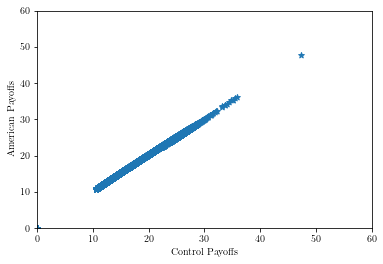

In [38]:
plt.scatter(Control_payoffs_ex, American_payoffs_ex, marker='*', label='Payoffs')
plt.xlabel('Control Payoffs')
plt.ylabel('American Payoffs')

# Set axis limits
x_min, x_max = 0, 60
y_min, y_max = 0, 60 
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max);

In [39]:
# Calculates Y_i's
θ_ex = calculate_theta(American_payoffs_ex, Control_payoffs_ex)
Y_ex = American_payoffs_ex + θ_ex*(Control_payoffs_ex - Control_mean_ex)
ρ_ex = calculate_correlation(American_payoffs_ex, Control_payoffs_ex)
squared_corr_ex = ρ_ex**2
price_estimate_ex = np.mean(Y_ex)
variance_ratio_ex = np.var(American_payoffs_ex) / np.var(Y_ex)
reduction_factor_ex = (1-squared_corr_ex)**(-1)

# Print results
print(f'\u03C1: {ρ_ex:.6f}')
print(f'\u03C1^2: {squared_corr_ex:.6f}')
print(f'Control Variate Price Estimate: {price_estimate_ex:.6f}')
print(f'Variance Ratio of Payoffs (American/Control Variate): {variance_ratio_ex:.6f}')
print(f"Reduction Factor (1 - \u03C1^2)^(-1): {reduction_factor_ex:.6f}")

ρ: -0.999943
ρ^2: 0.999885
Control Variate Price Estimate: 12.458475
Variance Ratio of Payoffs (American/Control Variate): 96.317365
Reduction Factor (1 - ρ^2)^(-1): 8714.163824


## 3a) Control Variate Plot to be put in Assignment <a class="anchor" id="thirda-bullet"></a>

After some bruteforcing, we can plot it...

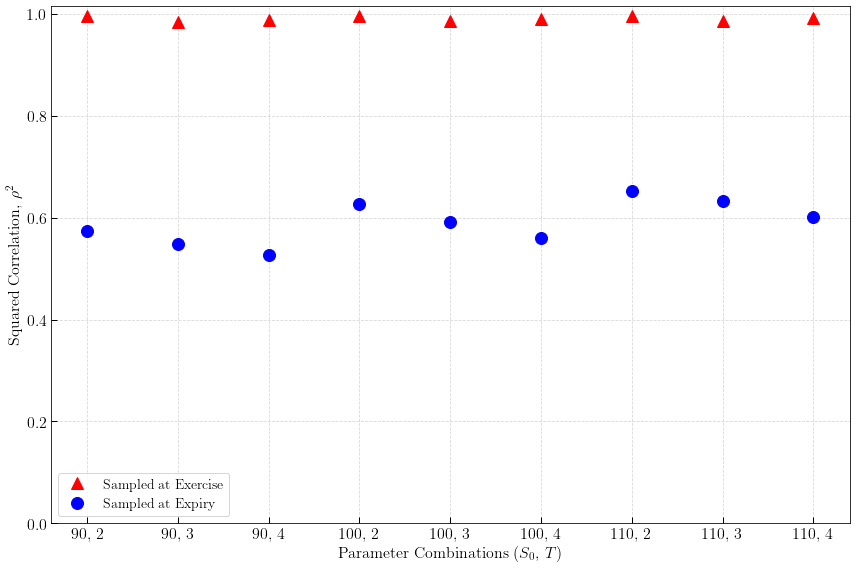

In [50]:
# data
parameter_combinations = ["90, 2", "90, 3", "90, 4",
                          "100, 2", "100, 3", "100, 4",
                          "110, 2", "110, 3", "110, 4"]

sampled_at_exercise = [0.996881, 0.984, 0.989,
                       0.9965, 0.986, 0.991,
                       0.997, 0.986, 0.992]

sampled_at_expiry = [0.573, 0.548, 0.526,
                     0.626, 0.591, 0.560,
                     0.652, 0.633, 0.601]

# Create figure and axis
plt.figure(figsize=(12, 8))
plt.plot(parameter_combinations, sampled_at_exercise, 'r^', label='Sampled at Exercise', markersize=12)
plt.plot(parameter_combinations, sampled_at_expiry, 'bo', label='Sampled at Expiry', markersize=12)

# Set the y-axis limit
plt.ylim([0, 1.015])

# labels and title
plt.xlabel('Parameter Combinations ($S_0$, $T$)', fontsize=16)
plt.ylabel('Squared Correlation, $\\rho^2$', fontsize=16)
#plt.title('Comparison of Sampled Correlations at Exercise and Expiry', fontsize=18)

# grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.tick_params(axis='both', direction='in', length=6, width=1, colors='black', grid_alpha=0.5, labelsize=16)

# customized legend
plt.legend(loc='lower left', fontsize=14, frameon=True)

# Save the figure to a PDF in the working folder
plt.tight_layout()

# Check for directory and save the figure
if not os.path.exists("../Results/plots"):
    os.makedirs("../Results/plots")

plt.savefig(f"../Results/plots/ControlVariate.pdf", bbox_inches='tight')

# Show the plot
plt.show()